In [1]:
#Import pickled Preprocessed DataFrame
import pickle
with open('./data/ibm_df.pickle', 'rb') as f:
    ibm_df = pickle.load(f)

In [2]:
#Import required pacakages
#Imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

#Matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

#Numpy
import numpy as np

#Pandas
import pandas as pd
import pandas_profiling

#Seaborn
import seaborn as sns
sns.set()

#Sklearn
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import median_absolute_error
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC

#XGBoost
from xgboost import XGBClassifier

C:\Users\moham\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\moham\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\moham\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\moham\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\moham\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\moham\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\moh

# Check Balance of Classes
- Look at proportion of classes to see if we're dealing with balanced or imbalanced data, since each one has its own set of tools to be used when fitting classifiers

# Get number of Yes/No Attritions

Left Company Samples = 237
Remained At Company Samples = 1233
Proportion of Remained to Left Samples = 19.22%


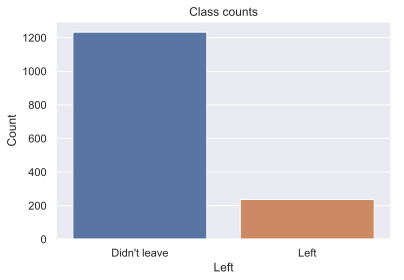

In [3]:
pos = ibm_df[ibm_df["Attrition"] == 1].shape[0]
neg = ibm_df[ibm_df["Attrition"] == 0].shape[0]
print("Left Company Samples = {}".format(pos))
print("Remained At Company Samples = {}".format(neg))
print("Proportion of Remained to Left Samples = {:.2f}%".format((pos / neg) * 100))
sns.countplot(ibm_df["Attrition"])
plt.xticks((0, 1), ["Didn't leave", "Left"])
plt.xlabel("Left")
plt.ylabel("Count")
plt.title("Class counts");

<h3> We have an imbalanced dataset.</h3> 
As a result, when we fit classifiers on such datasets, we should use metrics other than accuracy when comparing models such as:

- F1 Score
- AUC (Area under ROC Curve)

Moreover, class imbalance influences a learning algorithm during training by making the decision rule biased towards the majority class by implicitly learning a model that optimized the predictions based on the majority class in the dataset. There are three ways to deal with this issue.

- Assign a larger penalty to wrong predictions from the minority class
- Upsampling the minority class or downsampling the majority class
- Generate synthetic training examples

Steps to Address This

First:
- split the data into training and test sets using 80/20 split; 80% of the data will be used to train the models and 20% to test the performance of the models. 
Second: 
- Upsample the minority class and downsample the majority class. For this data set, positive class is the minority class and negative class is the majority class.

In [4]:
X = ibm_df.loc[:, ibm_df.columns != "Attrition"].values
y = ibm_df.loc[:, ibm_df.columns == "Attrition"].values.flatten()

In [5]:
#Split the data 80 - 20  train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

'''
Stratified sampling aims at splitting one data set so that each split are similar with respect to something.

In a classification setting, it is often chosen to ensure that the train and test sets have approximately the 
same percentage of samples of each target class as the complete set.

As a result, if the data set has a large amount of each class, stratified sampling is pretty much the same as 
random sampling. But if one class isn't much represented in the data set, which may be the case in your dataset 
since you plan to oversample the minority class, then stratified sampling may yield a different target class 
distribution in the train and test sets than what random sampling may yield.'''

"\nStratified sampling aims at splitting one data set so that each split are similar with respect to something.\n\nIn a classification setting, it is often chosen to ensure that the train and test sets have approximately the \nsame percentage of samples of each target class as the complete set.\n\nAs a result, if the data set has a large amount of each class, stratified sampling is pretty much the same as \nrandom sampling. But if one class isn't much represented in the data set, which may be the case in your dataset \nsince you plan to oversample the minority class, then stratified sampling may yield a different target class \ndistribution in the train and test sets than what random sampling may yield."

In [6]:
# Now add some random oversampling of the minority classes using imblearn
'''
We always oversample after splitting into training and validation datasets inorder to prevent bleed information from the
validation set into the training of the model. If I upsample a dataset before splitting it into a train and validation set, 
I could end up with the same ovbservation in both datasets. As a result a complex enough model will be able to perfectly predict
the value for those observations when predicting on the validation set, inflating the accuracy and recall. 
'''
ros = RandomOverSampler(random_state=0)
X_resampled_up, y_resampled_up = ros.fit_sample(X_train,y_train)

In [7]:
#Smote Random Oversampling
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train,y_train)

In [8]:
#ADASYN Random Oversampling
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train,y_train)

In [9]:
print("Original shape:", X_train.shape, y_train.shape)
print("Random Upsampled Shape:", X_resampled_up.shape, y_resampled_up.shape)
print("SMOTE Upsampled Shape:", X_smoted.shape, y_smoted.shape)
print("ADASYN Upsampled Shape:", X_adasyn.shape, y_adasyn.shape)

Original shape: (1176, 39) (1176,)
Random Upsampled Shape: (1972, 39) (1972,)
SMOTE Upsampled Shape: (1972, 39) (1972,)
ADASYN Upsampled Shape: (1929, 39) (1929,)


In [10]:
#Downsample the majority class
X_resampled_down, y_resampled_down = RandomUnderSampler(random_state=0).fit_sample(X_train,y_train)

In [11]:
print("Original shape:", X_train.shape, y_train.shape)
print("Random Undersampled Shape:", X_resampled_down.shape, y_resampled_down.shape)

Original shape: (1176, 39) (1176,)
Random Undersampled Shape: (380, 39) (380,)


In [12]:
#Randomly Upsample the minority class.

X_train_up, y_train_up = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True, # sample with replacement
                                n_samples=X_train[y_train == 0].shape[0],# to match majority class
                                random_state=1) # reproducible results

X_train_up = np.concatenate((X_train[y_train == 0], X_train_up))
y_train_up = np.concatenate((y_train[y_train == 0], y_train_up))

In [13]:
#Randomly Downsample the minority class.

X_train_down, y_train_down = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True, # sample with replacement
                                n_samples=X_train[y_train == 1].shape[0],# to match majority class
                                random_state=1) # reproducible results

X_train_down = np.concatenate((X_train[y_train == 1], X_train_down))
y_train_down = np.concatenate((y_train[y_train == 1], y_train_down))

In [14]:
print("Original shape:", X_train.shape, y_train.shape)
print("Random Upsampled shape:", X_train_up.shape, y_train_up.shape)
print("Random Downsampled shape:", X_train_down.shape, y_train_down.shape)

Original shape: (1176, 39) (1176,)
Random Upsampled shape: (1972, 39) (1972,)
Random Downsampled shape: (380, 39) (380,)


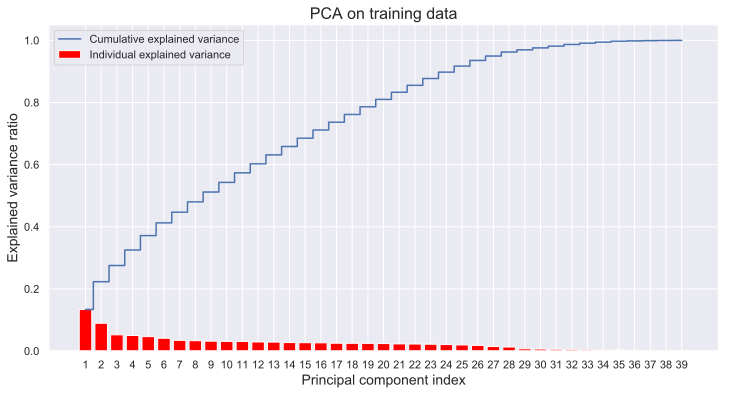

In [15]:
#It’s good to see how many principal components needed to explain 90%, 95% and 99% of the variation in the data.
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(X_train))
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 40), pca.explained_variance_ratio_, align="center",
        color='red', label="Individual explained variance")
plt.step(range(1, 40), cum_var_exp, where="mid", label="Cumulative explained variance")
plt.xticks(range(1, 40))
plt.legend(loc="best")
plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16});

In [16]:
cum_var_exp

array([0.13379822, 0.22313997, 0.27527306, 0.32521974, 0.37151212,
       0.4125722 , 0.44690786, 0.48009009, 0.51181185, 0.54284323,
       0.57361672, 0.60271269, 0.63130443, 0.6583894 , 0.68512913,
       0.71150868, 0.73656145, 0.76147578, 0.78615695, 0.81004347,
       0.83290905, 0.85528171, 0.87712909, 0.89780579, 0.91728609,
       0.93540397, 0.94960002, 0.96246273, 0.96953458, 0.97583456,
       0.98149984, 0.98680855, 0.99088464, 0.99430659, 0.99736473,
       0.99833031, 0.99919519, 0.99976146, 1.        ])

In [17]:
#95% of the variance in our data is explained by 28 of our features and 99%  of the variance is explained by 33 of our features

The methodology that we’ll follow when building the classifiers goes as follows:

Build a pipeline that handles all the steps when fitting the classifier using scikit-learn’s `make_pipeline` which will have two steps:

I. Standardizing the data to speed up convergence and make all features on the same scale.

II. The classifier (estimator) we want to use to fit the model.

2. Use GridSearchCV to tune hyperparameters using 10-folds cross validation. We can use RandomizedSearchCV which is faster and may outperform GridSearchCV especially if we have more than two hyperparameters and the range for each one is very big; however, GridSearchCV will work just fine since we have only two hyperparameters and descent range.

3. Fit the model using training data.

4. Plot both confusion matrix and ROC curve for the best estimator using test data.

Repeat the above steps for `Random Forest`, `Gradient Boosting Trees`, `K-Nearest Neighbors`, `Logistic Regression` and `Support Vector Machine`. Next, pick the classifier that has the highest cross validation f1 score.